# <b> Terminology related to Linear Regression with Perceptron

+ Tensor: Tensor is an array that stores the data just like any other data structure. The collection of stored values can be easily accessed through indexing. Scalar –> Vector –> Matrix –> Tensor


+ Optimization: The process of changing certain values(s) to get a better result altogether.

+ Loss: The difference between actual and expected output. The term signifies the value that needs to be minimized to get the best-optimized model.

+ Variable: The input values that we already possess as the data to create a model on are called variables. 

+ Weights: The coefficient values that are attached to the linear equation and optimized during the training to minimize the loss are called weights of a model. 

+ Bias: The constant value used in the linear equation to manage the vertical placement of the line over the cartesian plane. 

# <b> What is Perceptron?
The simplest neural network which is nothing but a single neuron is termed a Perceptron. 

A Neuron is nothing but a couple of mathematical functions stacked on top of each other. Here is how it looks like diagrammatically.The equation is a simple functional equation that applies a function on input and produces an output.

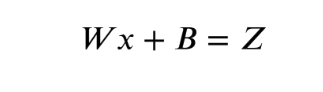
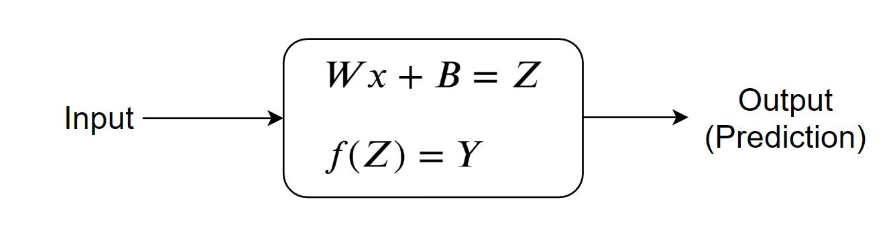

## 1. Importing libraries and Creating Dataset

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import warnings
warnings.filterwarnings('ignore')


Dataset is created using NumPy arrays.

In [36]:
x_train = np.array([[4.7], [2.4], [7.5], [7.1], [4.3],
                   [7.8], [8.9], [5.2], [4.59], [2.1],
                    [8], [5], [7.5], [5], [4],
                    [8], [5.2], [4.9], [3], [4.7],
                    [4], [4.8], [3.5], [2.1], [4.1]],
                   dtype = np.float32)


In [37]:
y_train = np.array([[2.6], [1.6], [3.09], [2.4], [2.4],
                    [3.3], [2.6], [1.96], [3.13], [1.76],
                    [3.2], [2.1], [1.6], [2.5], [2.2],
                    [2.75], [2.4], [1.8], [1], [2],
                    [1.6], [2.4], [2.6], [1.5], [3.1]],
                   dtype = np.float32)


We created the dataset with some random values as a NumPy array data structure.

Visualizing the data.

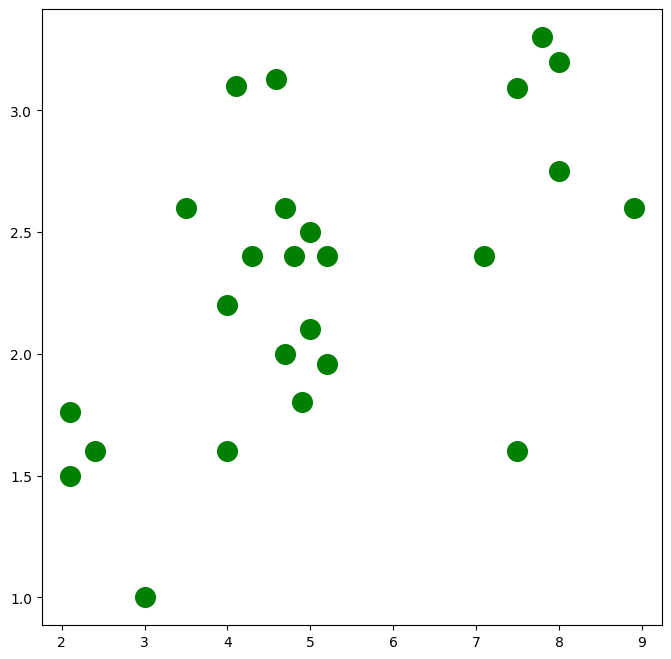

In [38]:
plt.figure(figsize=(8, 8))
plt.scatter(x_train, y_train, c='green', s=200, label='Original data')
plt.show()

## 2. Data preparation and Modelling with Pytorch

Now, the next step is to convert these NumPy arrays into PyTorch tensors(termed above in terminology) because they are the backend data structures that will enable all PyTorch functionalities for further machine learning, deep learning code. So, let us do that.

In [39]:
X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)
print('requires_grad for X_train: ', X_train.requires_grad)
print('requires_grad for Y_train: ', Y_train.requires_grad)


requires_grad for X_train:  False
requires_grad for Y_train:  False


**Note**: `requires_grad` is the property that manages information in the tensor regarding whether the gradient of the tensor will be calculated during training or not. All the tensors with False value don’t get to store their gradients for their further use.

## <b> Modeling in Pytorch

In this notebook, we are creating the simplest model possible. This model is nothing but the first equation of the neuron which is responsible for determining the linearity in data as mentioned above. Parameters of the model are W1 and b1, which are weight and bias, respectively. These parameters are independent in how they turn out to be after getting tuned by the optimizer during training. On the other hand, we have some hyperparameters, which are controllable by the developer and specifically used to manage and direct the process into a more optimized direction during training. Let us have a look at the parameters first.

In [40]:
w1 = torch.rand([1,1], requires_grad=True)


In [41]:
b1 = torch.rand([1,1], requires_grad=True)


Do note that, here we are explicitly declaring that these tensor variables should have their requied_grad value as True so that their gradient gets calculated during training and used by the optimizer to tune them further.

These are some of the hyperparameters that are used. Different neural network architecture comes with different hyperparameters. Here are the ones, we will use in this model.

In [42]:
input_size, hidden_size, output_size = 1, 1, 1
learning_rate = 0.001


input_size, hidden_size and output_size, all these values are 1 because there is only a single neuron. Their value indicated the number of neurons used by their layers. Learning rate as the name suggests is the amount of sensitivity that the network assumes before changing the parameters. For example, a learning rate too big will cause drastic changes in value and it becomes harder to reach the optimal result. Similarly, having it too small makes the model take too long of a time to reach the optimal.

## <b> Training and Visualizing Linear Regression Model with Perceptron in Pytorch

Training refers to the phase in your artificial intelligence workflow when you let your model learn by feeding it data and letting it optimize the values responsible for predictions. This is an iterative process that requires multiple pass-through of data from the model and gradually makes it better and accurate. The training phase is divided into 2 phases, Forward propagation and backward propagation. To understand the dynamics of a neuron, I have disintegrated the subprocess involved in backward propagation as different individual steps (steps 2-4). Before directing towards these phases in PyTorch.

You should keep in mind that, Forward propagation is data coming from inputs and passing through all the components in the model, till the output value is calculated. Backward propagation starts with the calculation of loss between the predicted value and label value and then optimizing the network parameters on the basis of their individually calculated gradients with respect to the loss calculated earlier. Here is how it is done with PyTorch.

In [43]:
for iter in range(1, 4001):
    y_pred = X_train.mm(w1).clamp(min=0).add(b1) # mm same as @ 
    loss = (y_pred - Y_train).pow(2).sum()
    if iter % 100 == 0:
        print(iter, loss.item())
    loss.backward()
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        b1 -= learning_rate * b1.grad
        w1.grad.zero_()
        b1.grad.zero_()
        
        

100 6.333201885223389
200 6.185253143310547
300 6.139922142028809
400 6.12603235244751
500 6.121776580810547
600 6.120472431182861
700 6.1200737953186035
800 6.119950294494629
900 6.119913101196289
1000 6.119902610778809
1100 6.119898319244385
1200 6.119898796081543
1300 6.119897842407227
1400 6.119896411895752
1500 6.119897365570068
1600 6.119897365570068
1700 6.11989688873291
1800 6.119897365570068
1900 6.11989688873291
2000 6.11989688873291
2100 6.11989688873291
2200 6.11989688873291
2300 6.11989688873291
2400 6.11989688873291
2500 6.11989688873291
2600 6.11989688873291
2700 6.11989688873291
2800 6.11989688873291
2900 6.11989688873291
3000 6.11989688873291
3100 6.11989688873291
3200 6.11989688873291
3300 6.11989688873291
3400 6.11989688873291
3500 6.11989688873291
3600 6.11989688873291
3700 6.11989688873291
3800 6.11989688873291
3900 6.11989688873291
4000 6.11989688873291


1. Forward Pass:

Predicting output value Y with input value X using the linear equation. 

2. Finding Loss:

Finding the difference between Y_train and Y_pred by squaring the difference and then summing it.

3. For the loss_backward() function call:

backward pass will compute the gradient of the loss with respect to all Tensors with ‘requires_grad=True’.

4. Manually updating the weights

Weights have `requires_grad=True`, but we don’t need to track this in ‘autograd’. So will wrap it in ‘torch.no_grad’ updating the reduced weight by subtracting the multiplication of learning rate and gradients manually zero the weight gradients after updating weights to store the latest values for the next iteration. 

Let us check the optimized value for W1 and b1:

In [44]:
print('w1: ', w1)
print('b1: ', b1)


w1:  tensor([[0.1751]], requires_grad=True)
b1:  tensor([[1.4045]], requires_grad=True)


Getting the prediction values using the weights in the linear equation.

In [45]:
predicted = (X_train.mm(w1).clamp(min=0).add(b1)).detach().numpy()


## Visualizing the Prediction and Actual values


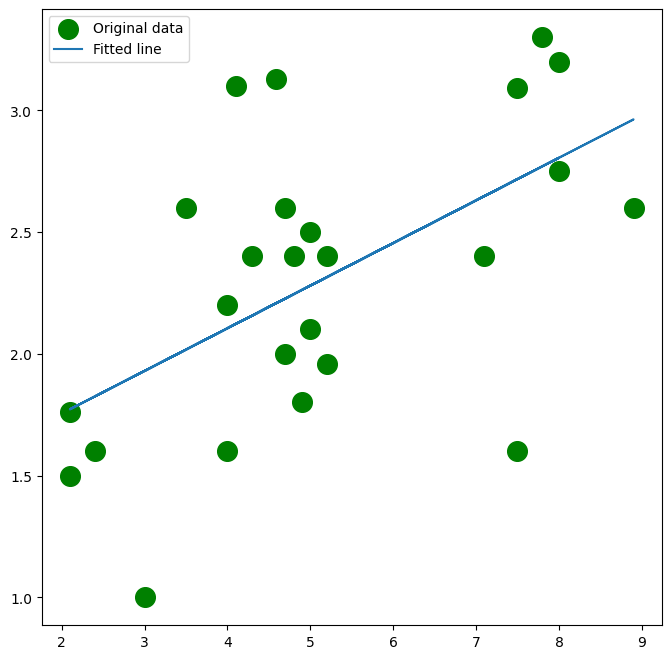

In [46]:
plt.figure(figsize=(8,8))
plt.scatter(x_train, y_train, c='green', s=200, label='Original data')
plt.plot(x_train, predicted, label = 'Fitted line')
plt.legend()
plt.show()


So, here we have it. A simple linear model, built and trained using PyTorch. There are various ways to build a simple linear model, but through this notebook, you got to understand and get familiar with some of the critical functions in PyTorch to create a neural network. This time it was a neuron, but these same things can be expanded into something more robust and optimal particularly by adding activation function or working with multiple neurons or both. You can easily form them into a full-fledged deep neural network. I suggest you try and make multiple neural structures and deepen your understanding using PyTorch.